## MetENP

MetENP is a R package that enables detection of significant metabolites from metabolite information 
(names or names and concentration along with metadata information) and provides

1. Enrichment score of metabolite class,
2. Maps to pathway of the species of choice,
3. Calculate enrichment score of pathways,
4. Plots the pathways and shows the metabolite increase or decrease
5. Gets gene info, reaction info, enzyme info

For more info, check out the vignette.

In [1]:
.libPaths('/Users/Callie/Library/R/4.0/library') 

.libPaths()

[1] "/Users/Callie/Library/R/4.0/library"                           
[2] "/Library/Frameworks/R.framework/Versions/4.0/Resources/library"

In [7]:
library(BiocManager)

Bioconductor version 3.12 (BiocManager 1.30.10), ?BiocManager::install for help



In [4]:
install.packages("devtools")

Installing package into ‘/Users/Callie/Library/R/4.0/library’
(as ‘lib’ is unspecified)




The downloaded binary packages are in
	/var/folders/3g/1wn3llj96zgckvyltw6s_bpw0000gp/T//Rtmp3EPOlY/downloaded_packages


In [5]:
install.packages("BiocManager")

Installing package into ‘/Users/Callie/Library/R/4.0/library’
(as ‘lib’ is unspecified)




The downloaded binary packages are in
	/var/folders/3g/1wn3llj96zgckvyltw6s_bpw0000gp/T//Rtmp3EPOlY/downloaded_packages


Installing package into ‘/Users/Callie/Library/R/4.0/library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘installr’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


ERROR: Error in updateR(): could not find function "updateR"


In [3]:
R.Version()

$platform
[1] "x86_64-apple-darwin17.0"

$arch
[1] "x86_64"

$os
[1] "darwin17.0"

$system
[1] "x86_64, darwin17.0"

$status
[1] ""

$major
[1] "4"

$minor
[1] "0.3"

$year
[1] "2020"

$month
[1] "10"

$day
[1] "10"

$`svn rev`
[1] "79318"

$language
[1] "R"

$version.string
[1] "R version 4.0.3 (2020-10-10)"

$nickname
[1] "Bunny-Wunnies Freak Out"

In [4]:
if (!requireNamespace("KEGGREST", quietly = TRUE))
    BiocManager::install("KEGGREST", update = TRUE, ask = FALSE)

In [10]:
if (!requireNamespace("KEGGgraph", quietly = TRUE))
    BiocManager::install("KEGGgraph", update = TRUE, ask = FALSE)

In [11]:
if (!requireNamespace("pathview", quietly = TRUE))
    BiocManager::install("pathview", update = TRUE, ask = FALSE)



##############################################################################
Pathview is an open source software package distributed under GNU General
Public License version 3 (GPLv3). Details of GPLv3 is available at
http://www.gnu.org/licenses/gpl-3.0.html. Particullary, users are required to
formally cite the original Pathview paper (not just mention it) in publications
or products. For details, do citation("pathview") within R.

The pathview downloads and uses KEGG data. Non-academic uses may require a KEGG
license agreement (details at http://www.kegg.jp/kegg/legal.html).
##############################################################################



In [12]:
if (!requireNamespace("KEGG.db", quietly = TRUE))
    BiocManager::install("KEGG.db", update = TRUE, ask = FALSE)


KEGG.db contains mappings based on older data because the original
  resource was removed from the the public domain before the most
  recent update was produced. This package should now be considered
  deprecated and future versions of Bioconductor may not have it
  available.  Users who want more current data are encouraged to look
  at the KEGGREST or reactome.db packages




In [13]:
if (!requireNamespace("MetENP", quietly = TRUE))
    devtools::install("..", upgrade = "never")

In [2]:
library(MetENP)

#### If you do not wish to install, alternatively, download from github(https://github.com/metabolomicsworkbench/MetENP) and load libraries and functions

In [3]:
data = getmwstudies('ST000915', 'data')
typeof('ST000915')
head(data)

[1] "character"

analysis_id,analysis_summary,metabolite_name,metabolite_id,refmet_name,NASH001,NASH002,NASH003,NASH004,NASH005,⋯,NASH061,NASH062,NASH064,NASH065,NASH066,NASH067,NASH068,NASH069,NASH070,NASH074
<named list>,<named list>,<named list>,<named list>,<named list>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
AN001485,Core G Fatty acids/Eicosanoids,10 HDoHE,ME230937,10-HDoHE,0.00419,0.01396,0.00285,0.00705,0.00020,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AN001485,Core G Fatty acids/Eicosanoids,"11,12-diHETrE",ME230961,"11,12-DiHETrE",0.01346,1.84739,0.63897,1.87466,0.21119,⋯,0.12842,0.16833,0.12114,0.32882,0.10923,0.21540,0.24789,0.25932,0.03551,0.05935
AN001485,Core G Fatty acids/Eicosanoids,"11,12-EET",ME230954,"11,12-EpETrE",0.20666,0.12915,0.18170,0.11368,0.06081,⋯,0.06934,0.06330,0.04931,0.10011,0.10355,0.16318,0.10468,0.05115,0.08985,0.10916
AN001485,Core G Fatty acids/Eicosanoids,11b PGE2,ME230914,11beta-PGE2,0.00048,0.00128,NA,NA,NA,⋯,0.00165,0.00327,0.00153,NA,NA,NA,NA,0.00445,NA,NA
AN001485,Core G Fatty acids/Eicosanoids,11 HDoHE,ME230941,11-HDoHE,0.00617,0.03174,0.00958,0.00593,0.00271,⋯,0.03543,0.01280,0.00369,0.01844,0.00649,0.03449,0.01077,0.01869,0.00414,0.01129
AN001485,Core G Fatty acids/Eicosanoids,11-HEPE,ME230917,11-HEPE,0.00642,NA,0.01625,0.02049,0.00115,⋯,0.14650,0.03245,0.01528,0.01148,0.03754,0.01260,0.03738,0.00957,0.00057,0.01524


In [4]:
metadata = getmwstudies('ST000915', 'factors')
head(metadata)

,study_id,local_sample_id,subject_type,factors,Diagnosis
,<named list>,<named list>,<named list>,<named list>,<chr>
1,ST000915,NASH005,Human clinical study,Diagnosis:Cirrhosis,Cirrhosis
2,ST000915,NASH007,Human clinical study,Diagnosis:Cirrhosis,Cirrhosis
3,ST000915,NASH009,Human clinical study,Diagnosis:Cirrhosis,Cirrhosis
4,ST000915,NASH013,Human clinical study,Diagnosis:Cirrhosis,Cirrhosis
5,ST000915,NASH016,Human clinical study,Diagnosis:Cirrhosis,Cirrhosis
6,ST000915,NASH022,Human clinical study,Diagnosis:Cirrhosis,Cirrhosis


Find the factors you would want to compare
Multiple factors (independent variables) are formatted in multiple columns but you can get information on all the factors by "factors" column, such as 'TreatmentGroup:Prednisolone', this indicates column name 'TreatmentGroup' with factor Prednisolone. For t-test use the factors in the same column. For comparing multipe independent variables use anova by anova_ana function.


### Associate metabolomics data to the refmet class


In [5]:
refmet_class= convert_refmet(data)
head(refmet_class)

,metabolite_name,analysis_id,analysis_summary,metabolite_id,refmet_name,NASH001,NASH002,NASH003,NASH004,NASH005,⋯,NASH066,NASH067,NASH068,NASH069,NASH070,NASH074,formula,super_class,main_class,sub_class
,<chr>,<named list>,<named list>,<named list>,<named list>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,"1,2-DG(30:0)",AN001488,Core E Neutral Lipids,ME231190,"1,2-DG 30:0",2.7,NA,NA,NA,NA,⋯,193.4,55.0,75.9,99.1,173.0,591.6,C33H64O5,Glycerolipids,Diradylglycerols,DAG
2,"1,2-DG(30:1)",AN001488,Core E Neutral Lipids,ME231189,"1,2-DG 30:1",1.8,NA,NA,NA,NA,⋯,185.3,30.0,37.5,97.3,185.6,749.1,C33H62O5,Glycerolipids,Diradylglycerols,DAG
3,"1,2-DG(32:0)",AN001488,Core E Neutral Lipids,ME231196,"1,2-DG 32:0",12.2,7.1,2.2,2.0,1.4,⋯,1289.5,401.0,350.9,420.2,713.2,1375.8,C35H68O5,Glycerolipids,Diradylglycerols,DAG
4,"1,2-DG(32:1)",AN001488,Core E Neutral Lipids,ME231195,"1,2-DG 32:1",7.6,5.7,2.1,1.4,1.1,⋯,844.7,187.7,266.9,436.2,715.7,1932.0,C35H66O5,Glycerolipids,Diradylglycerols,DAG
5,"1,2-DG(32:2)",AN001488,Core E Neutral Lipids,ME231194,"1,2-DG 32:2",2.0,1.9,NA,NA,NA,⋯,345.8,78.2,77.3,184.5,336.2,697.2,C35H64O5,Glycerolipids,Diradylglycerols,DAG
6,"1,2-DG(32:3)",AN001488,Core E Neutral Lipids,ME231193,"1,2-DG 32:3",NA,NA,NA,NA,NA,⋯,63.0,12.4,7.8,52.6,63.8,124.3,C35H62O5,Glycerolipids,Diradylglycerols,DAG


In [6]:
unique(metadata$factors)

[[1]]
[1] "Diagnosis:Cirrhosis"

[[2]]
[1] "Diagnosis:NASH"

[[3]]
[1] "Diagnosis:Normal"

[[4]]
[1] "Diagnosis:Steatosis"

In [7]:
### Find the analysis mode
unique(data$analysis_summary)

[[1]]
[1] "Core G Fatty acids/Eicosanoids"

[[2]]
[1] "Core J Sterols"

[[3]]
[1] "Core K Prenols/Cardiolipins"

[[4]]
[1] "Core E Neutral Lipids"

[[5]]
[1] "Core I Sphingolipids"

[[6]]
[1] "Core H Phospholipids"

### Find significant metabolites, run significance of all the analysis summary together. The analysis summary/modes you got in the previous section
There is a normalization step which takes into account missing values, and this can be achieved via three methods:

1) half_of_min: where the NAs are replaced by half of min values in the data

2) remove_NAs: where Cols with NAs values are removed

3) 50percent: where cols with more than 50% NAs values are removed

half_of_min is ideal when you wish to see which metabolites were present in either group. Very high fold change would mean it was present in either group. 

In [8]:
stats_metabolites = significant_met(metabolomics_data=refmet_class, met_col="metabolite_name",analysis_type=c("Core G Fatty acids/Eicosanoids","Core J Sterols","Core K Prenols/Cardiolipins","Core E Neutral Lipids","Core I Sphingolipids","Core H Phospholipids"), metadata=metadata, factor1='Cirrhosis', factor2=c('Normal'), factor_col='Diagnosis',sample_col='local_sample_id', p_adjust='fdr',normalization="50percent")

sig_metabolites = stats_metabolites[which(stats_metabolites[,"pval"] <= 0.05&abs(stats_metabolites[,"log2Fold_change"])>0.5),]


Warning message:
“ggrepel: 48 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


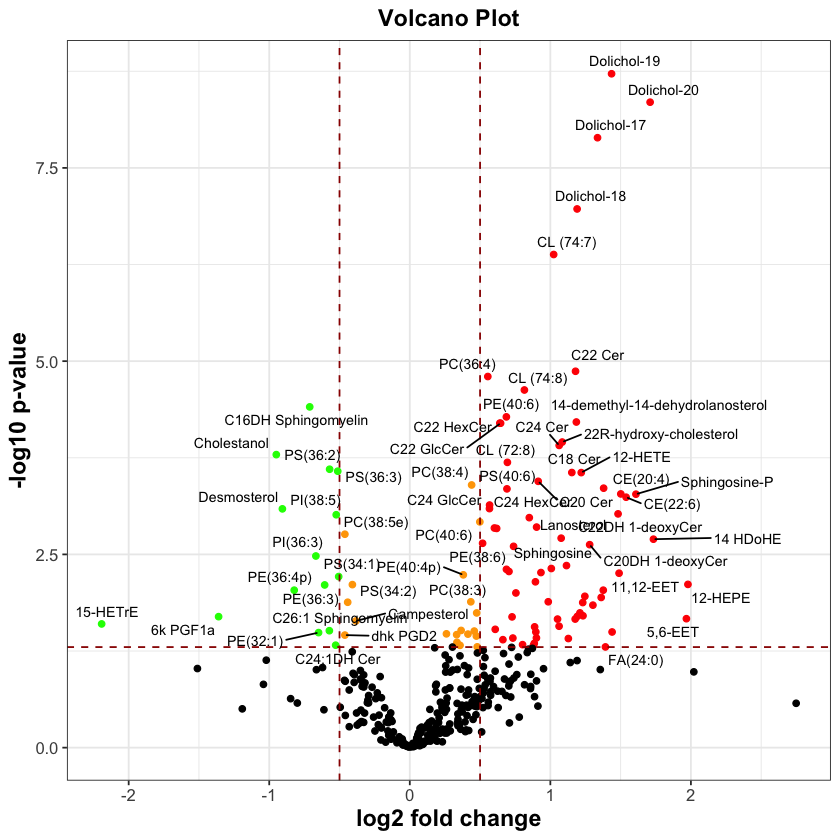

In [9]:
plot_volcano(stats_metabolites, thres_pval= 0.05,thres_log2foldchange = 0.5, TRUE)

### Map metabolite class of the significant metabolites utilzing refmet classification in Metabolomics Workbench
This function not only maps metabolite to metabolite class but also to external databases such as pubchem, inchi key, smiles and kegg

In this example, we will go forward with significant metabolite obtained by t-test/

In [10]:
sig_metabolites_kegg_id= map_keggid(sig_metabolites)

#### Check all your significant metabolites have not been assigned metabolite class

In [11]:
setdiff(sig_metabolites$refmet_name, sig_metabolites_kegg_id$refmet_name)

character(0)

### Count metabolites in each of the metabolite class and plotting
You may choose from sub_class, main_class and super_class

In [12]:
count_changes = metcountplot(df_metclass=sig_metabolites_kegg_id, metclass='sub_class', plotting=TRUE, thres_logfC = 0.5)


Warning message:
“Use of `count_changes[[metclass]]` is discouraged. Use `.data[[metclass]]` instead.”


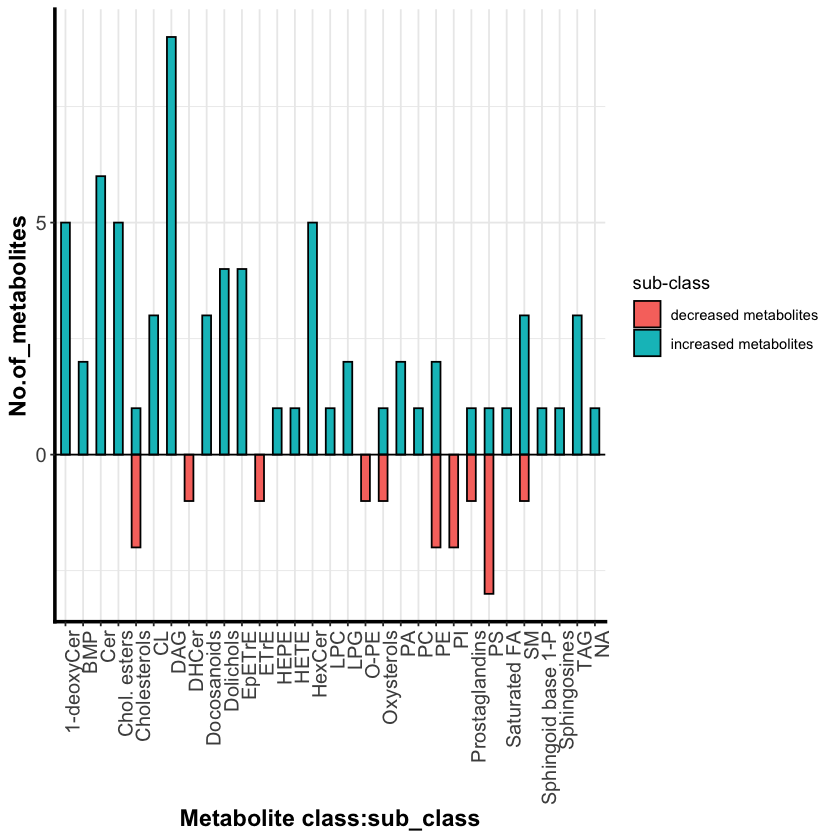

In [13]:
count_changes$plotimg

### Enrichment class score

Calculate the enrichment score of each metabolite class. Enrichment score is calculated through hypergeometric method. One can specify the no. of significant metabolites in a class while calculating the enrichment score. We advice to use the number of mtabolites in each class as 3 or more. But if someone just wants to know the enrichment score and rest of the information of all the metabolites, then they can choose the number as 1.

In [14]:
metenrichment = metclassenrichment(df_metclass=sig_metabolites_kegg_id,refmet_class, metclass="sub_class",enrich_stats="HG",no=3)

#### Plot the enrichment score via function plot_met_enrichment

Warning message:
“Use of `metclass_stats[[metclass]]` is discouraged. Use `.data[[metclass]]` instead.”
Warning message:
“Use of `metclass_stats[[enrich_stats]]` is discouraged. Use `.data[[enrich_stats]]` instead.”
Warning message:
“Use of `metclass_stats[[enrich_stats]]` is discouraged. Use `.data[[enrich_stats]]` instead.”


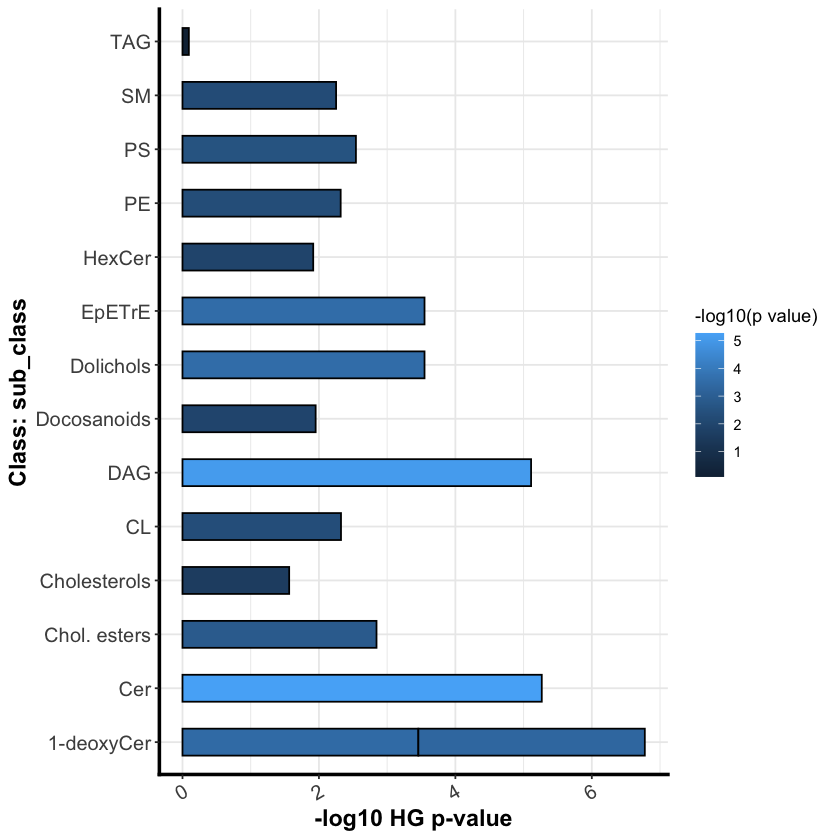

In [15]:
plot_met_enrichment(metenrichment, "sub_class","HG", no=3)

### Check the pathways with reactions of all the significant metabolites

In [16]:
met_path = met_pathways(df_metenrichment = metenrichment, 'hsa')
head(met_path)

,rxn,refmet_name,Exact mass,KEGG ID,Metabolite,Cirrhosis_mean,Normal_mean,Fold_change,log2Fold_change,t_value,⋯,metabolite_id,super_class,main_class,sub_class,formula,HG p-value,Rxn_name,PATHWAY,pathway_id,sps_path_id
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<named list>,<chr>,<chr>,<chr>,<chr>,<dbl>,<named list>,<chr>,<chr>,<chr>
1,R01003,Dolichol-20,1381.2782,C00381,Dolichol-20,18.54100,60.64903,3.271077,1.709766,-7.141005,⋯,ME231044,Prenol Lipids,Polyprenols,Dolichols,C100H164O,2.832851e-04,dolichyl-phosphate phosphohydrolase,N-Glycan biosynthesis,rn00510,hsa00510
2,R01003,Dolichol-20,1381.2782,C00381,Dolichol-20,18.54100,60.64903,3.271077,1.709766,-7.141005,⋯,ME231044,Prenol Lipids,Polyprenols,Dolichols,C100H164O,2.832851e-04,dolichyl-phosphate phosphohydrolase,Metabolic pathways,rn01100,hsa01100
3,R01018,Dolichol-20,1381.2782,C00381,Dolichol-20,18.54100,60.64903,3.271077,1.709766,-7.141005,⋯,ME231044,Prenol Lipids,Polyprenols,Dolichols,C100H164O,2.832851e-04,CTP:dolichol O-phosphotransferase,N-Glycan biosynthesis,rn00510,hsa00510
4,R01018,Dolichol-20,1381.2782,C00381,Dolichol-20,18.54100,60.64903,3.271077,1.709766,-7.141005,⋯,ME231044,Prenol Lipids,Polyprenols,Dolichols,C100H164O,2.832851e-04,CTP:dolichol O-phosphotransferase,Metabolic pathways,rn01100,hsa01100
5,R01312,"1,2-DG 34:0",596.5380,C00641,"1,2-DG(34:0)",182.8600,413.3597,2.260526,1.176658,-2.377108,⋯,ME231203,Glycerolipids,Diradylglycerols,DAG,C37H72O5,7.765032e-06,Phosphatidylcholine cholinephosphohydrolase,Glycerophospholipid metabolism,rn00564,hsa00564
6,R01312,"1,2-DG 36:4",616.5067,C00641,"1,2-DG(36:4)",165.5750,383.1855,2.314271,1.210558,-2.453312,⋯,ME231210,Glycerolipids,Diradylglycerols,DAG,C39H68O5,7.765032e-06,Phosphatidylcholine cholinephosphohydrolase,Glycerophospholipid metabolism,rn00564,hsa00564


Find metabolites for which no pathways were registered in Kegg and/or no kegg id was found

In [17]:
#setdiff(metenrichment$Metabolite,unique(met_path$Metabolite))

[1] "C16DH 1-deoxyCer" "C18DH 1-deoxyCer" "C20DH 1-deoxyCer" "C22DH 1-deoxyCer"
 [5] "C24DH 1-deoxyCer" "14 HDoHE"         "16 HDoHE"         "4 HDoHE"         
 [9] "CE(18:2)"         "CE(18:3)"         "CE(20:3)"         "CE(20:4)"        
[13] "CL (72:8)"        "CL (74:7)"        "CL (74:8)"        "Cholestanol"     
[17] "Dolichol-17"      "Dolichol-18"      "Dolichol-19"

### Get pathway enrichment sore.

Once we have the pathway information, we can calculate enrichment score of pathways. Again, here i have used hypergeometric score. For hypergeometric score, we need to know the total number of kegg compounds that are linked to kegg pathways. 
N = total no. of cmpds linked to kegg pathway (this is the step which might take long), so I advice to run the script comp_linkedto_pathways() just the first time or after 6 months or so if desired to run the pipeline again. save the result from comp_linkedto_pathways() and load it. Loading from saved file would save time for another analysis with another study. However the package takes care of loading. Save the data in the data folder.

L = No. of cmpds in a pathway
M= no. of altered cmpds in a pathway
K =  total no. of altered cmpds
phyper(M,L, N-L, K)


This function also utilizes korg dataset from pathview package.

In [18]:
load('../data/ls_path.RData')
load('../data/korg.RData')
kegg_es = path_enrichmentscore(met_path,sig_metabolite_kegg_id=sig_metabolite_kegg_id,ls_path=ls_path,refmet_class=refmet_class,sps='hsa',padj='fdr', kegg_comp_path=FALSE)

In [19]:
head(kegg_es)

,Pathway name,No.of mets in study,Total_no._of_comps_in_pathway,pathway_HG p-value,Padjust
,<fct>,<int>,<int>,<dbl>,<dbl>
1,Arachidonic acid metabolism,4,75,9.991730e-01,9.991730e-01
2,Glycerolipid metabolism,12,38,8.469408e-03,2.117352e-02
3,Glycerophospholipid metabolism,17,52,9.973045e-04,3.324348e-03
4,"Glycine, serine and threonine metabolism",4,50,9.705819e-01,9.991730e-01
5,Glycosylphosphatidylinositol (GPI)-anchor biosynthesis,13,16,5.698536e-09,2.849268e-08
6,Inositol phosphate metabolism,9,47,3.070207e-01,4.386011e-01


### Plot pathway network
Only plotting significant pathways (pathway with p-value significance).

The pathway network is such that it shows metabolites that are connected to different pathways and same metabolite in different pathway. Color of nodes of metabolites are according to the fold change of metabolites (low expression in green and high in red) and size of pathway nodes (square nodes) are according to the number of branches (meaning no of metabolites). All metabolite are written in blue

Warning message:
“ggrepel: 3 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


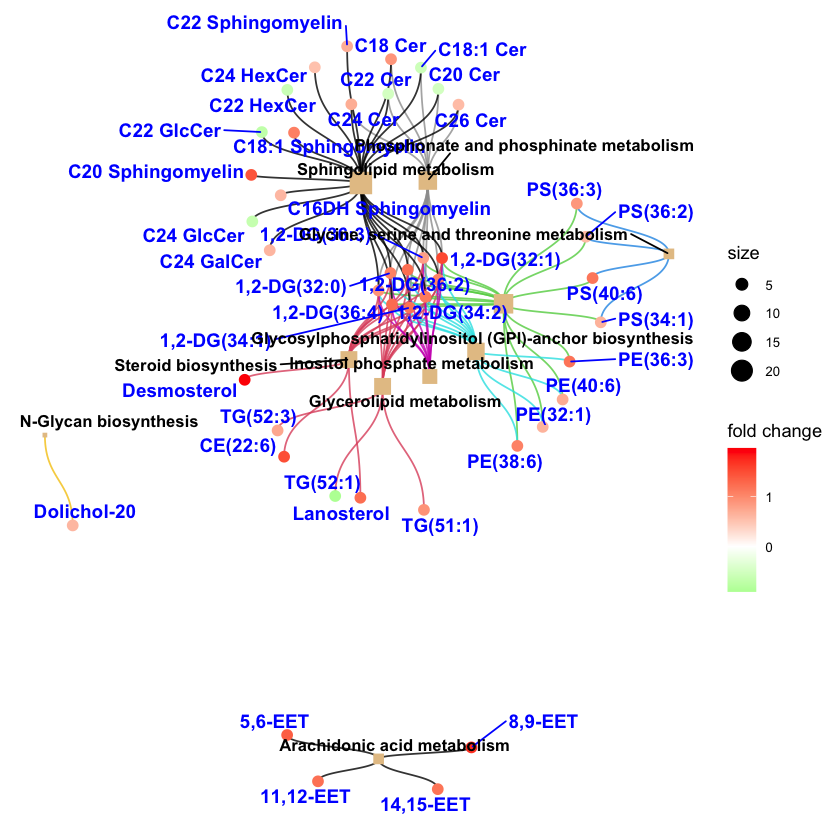

In [20]:
plot_pathway_networks (met_path,kegg_es, TRUE)

### Heatmap

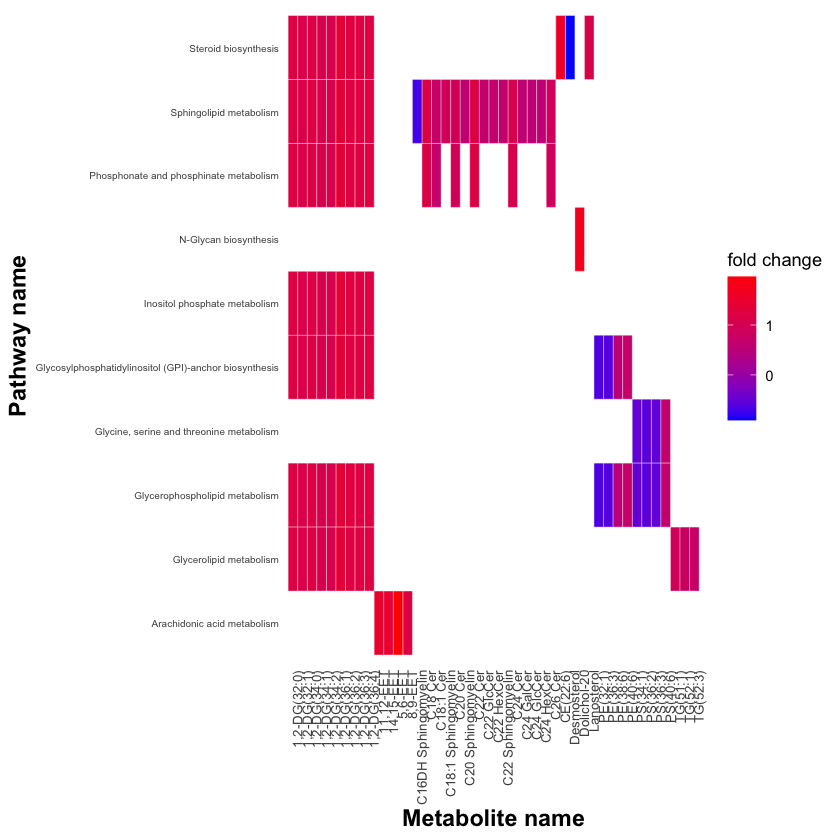

In [21]:
plot_heatmap(met_path, shorten_name=TRUE,refmet_name=FALSE, xaxis=8, yaxis=6)

### Dotplot

Warning message:
“Use of `significant_pathways[["pathway_HG p-value"]]` is discouraged. Use `.data[["pathway_HG p-value"]]` instead.”


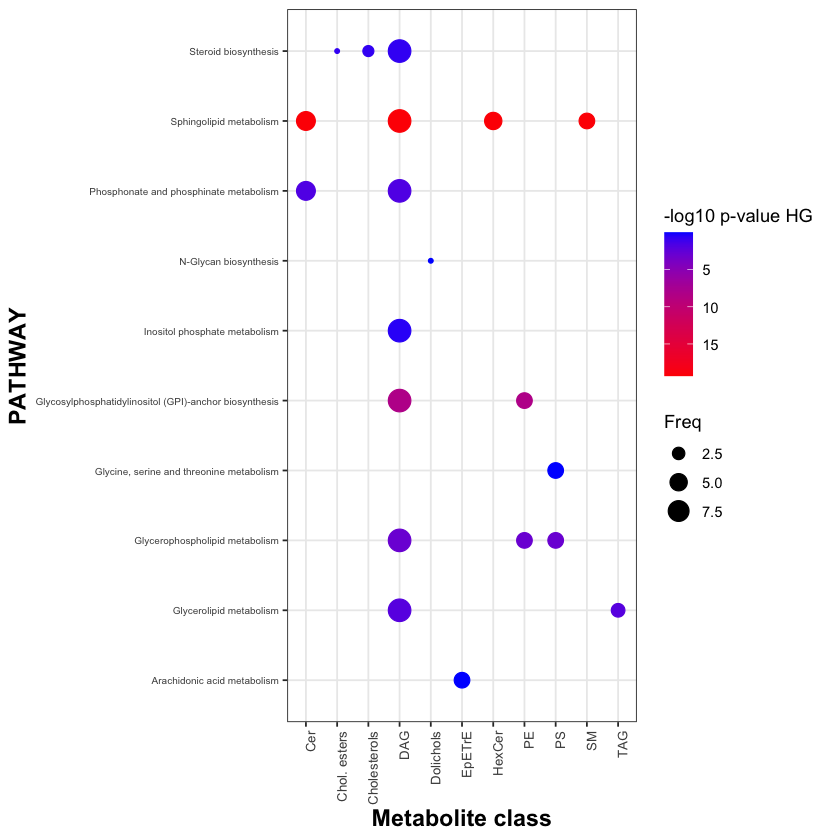

In [22]:
dotplot_met_class_path (met_path, kegg_es,"sub_class",xaxis=8,yaxis=6)

### Get the gene and enzyme info

Here we get the information of genes involved in enriched pathways for specified organism

In [23]:
met_gene_info = enzyme_gene_info (metenrichment, "hsa","sub_class")
head(met_gene_info)

,orthology_id,ORTHOLOGY,gene_id,gene_name,DEFINITION,ORGANISM,PATHWAY,DBLINKS,MOTIF,rxn,Metabolite,KEGG ID,sub_class,Rxn_name,RCLASS,EQUATION,EQUATION_more,ENZYME
,<chr>,<chr>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<chr>,<chr>,<chr>,<chr>,<named list>,<named list>,<named list>,<named list>,<named list>
1,K00551,phosphatidylethanolamine/phosphatidyl-N-methylethanolamine N-methyltransferase [EC:2.1.1.17 2.1.1.71],10400,"PEMT, PEAMT, PEMPT, PEMT2, PLMT, PNMT",(RefSeq) phosphatidylethanolamine N-methyltransferase,Homo sapiens (human),"Glycerophospholipid metabolism, Metabolic pathways","NCBI-GeneID: 10400 , NCBI-ProteinID: NP_009100, OMIM: 602391 , HGNC: 8830 , Ensembl: ENSG00000133027 , Vega: OTTHUMG00000059290 , Pharos: Q9UBM1(Tbio) , UniProt: Q9UBM1",Pfam: PEMT Herpes_UL74,R02056,PE(38:6),C00350,PE,S-adenosyl-L-methionine:phosphatidylethanolamine N-methyltransferase,"RC00003 C00019_C00021, RC00060 C00350_C01241",C00019 + C00350 <=> C00021 + C01241,S-Adenosyl-L-methionine + Phosphatidylethanolamine <=> S-Adenosyl-L-homocysteine + Phosphatidyl-N-methylethanolamine,2.1.1.17
2,K00551,phosphatidylethanolamine/phosphatidyl-N-methylethanolamine N-methyltransferase [EC:2.1.1.17 2.1.1.71],10400,"PEMT, PEAMT, PEMPT, PEMT2, PLMT, PNMT",(RefSeq) phosphatidylethanolamine N-methyltransferase,Homo sapiens (human),"Glycerophospholipid metabolism, Metabolic pathways","NCBI-GeneID: 10400 , NCBI-ProteinID: NP_009100, OMIM: 602391 , HGNC: 8830 , Ensembl: ENSG00000133027 , Vega: OTTHUMG00000059290 , Pharos: Q9UBM1(Tbio) , UniProt: Q9UBM1",Pfam: PEMT Herpes_UL74,R02056,PE(32:1),C00350,PE,S-adenosyl-L-methionine:phosphatidylethanolamine N-methyltransferase,"RC00003 C00019_C00021, RC00060 C00350_C01241",C00019 + C00350 <=> C00021 + C01241,S-Adenosyl-L-methionine + Phosphatidylethanolamine <=> S-Adenosyl-L-homocysteine + Phosphatidyl-N-methylethanolamine,2.1.1.17
3,K00551,phosphatidylethanolamine/phosphatidyl-N-methylethanolamine N-methyltransferase [EC:2.1.1.17 2.1.1.71],10400,"PEMT, PEAMT, PEMPT, PEMT2, PLMT, PNMT",(RefSeq) phosphatidylethanolamine N-methyltransferase,Homo sapiens (human),"Glycerophospholipid metabolism, Metabolic pathways","NCBI-GeneID: 10400 , NCBI-ProteinID: NP_009100, OMIM: 602391 , HGNC: 8830 , Ensembl: ENSG00000133027 , Vega: OTTHUMG00000059290 , Pharos: Q9UBM1(Tbio) , UniProt: Q9UBM1",Pfam: PEMT Herpes_UL74,R02056,PE(40:6),C00350,PE,S-adenosyl-L-methionine:phosphatidylethanolamine N-methyltransferase,"RC00003 C00019_C00021, RC00060 C00350_C01241",C00019 + C00350 <=> C00021 + C01241,S-Adenosyl-L-methionine + Phosphatidylethanolamine <=> S-Adenosyl-L-homocysteine + Phosphatidyl-N-methylethanolamine,2.1.1.17
4,K00551,phosphatidylethanolamine/phosphatidyl-N-methylethanolamine N-methyltransferase [EC:2.1.1.17 2.1.1.71],10400,"PEMT, PEAMT, PEMPT, PEMT2, PLMT, PNMT",(RefSeq) phosphatidylethanolamine N-methyltransferase,Homo sapiens (human),"Glycerophospholipid metabolism, Metabolic pathways","NCBI-GeneID: 10400 , NCBI-ProteinID: NP_009100, OMIM: 602391 , HGNC: 8830 , Ensembl: ENSG00000133027 , Vega: OTTHUMG00000059290 , Pharos: Q9UBM1(Tbio) , UniProt: Q9UBM1",Pfam: PEMT Herpes_UL74,R02056,PE(36:3),C00350,PE,S-adenosyl-L-methionine:phosphatidylethanolamine N-methyltransferase,"RC00003 C00019_C00021, RC00060 C00350_C01241",C00019 + C00350 <=> C00021 + C01241,S-Adenosyl-L-methionine + Phosphatidylethanolamine <=> S-Adenosyl-L-homocysteine + Phosphatidyl-N-methylethanolamine,2.1.1.17
5,K00637,sterol O-acyltransferase [EC:2.3.1.26],6646,"SOAT1, ACACT, ACAT, ACAT-1, ACAT1, SOAT, STAT",(RefSeq) sterol O-acyltransferase 1,Homo sapiens (human),"Steroid biosynthesis , Cholesterol metabolism","NCBI-GeneID: 6646 , NCBI-ProteinID: NP_003092, OMIM: 102642 , HGNC: 11177 , Ensembl: ENSG00000057252 , Vega: OTTHUMG00000035253 , Pharos: P35610(Tchem) , UniProt: P35610",Pfam: MBOAT COX6C,R01461,CE(22:6),C02530,Chol. esters,Acyl-CoA:cholesterol O-acyltransferase,"RC00004 C00010_C00040, RC00055 C00187_C0

#### Get the information if metabolite is a reactant or substrate

In [24]:
rclass_info = react_substrate(met_gene_info)
head(rclass_info)

,orthology_id,ORTHOLOGY,gene_id,gene_name,DEFINITION,ORGANISM,PATHWAY,DBLINKS,MOTIF,rxn,Metabolite,KEGG ID,sub_class,Rxn_name,RCLASS,EQUATION,EQUATION_more,ENZYME,reactant_product
,<chr>,<chr>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<chr>,<chr>,<chr>,<chr>,<named list>,<named list>,<named list>,<named list>,<named list>,<chr>
1,K00551,phosphatidylethanolamine/phosphatidyl-N-methylethanolamine N-methyltransferase [EC:2.1.1.17 2.1.1.71],10400,"PEMT, PEAMT, PEMPT, PEMT2, PLMT, PNMT",(RefSeq) phosphatidylethanolamine N-methyltransferase,Homo sapiens (human),"Glycerophospholipid metabolism, Metabolic pathways","NCBI-GeneID: 10400 , NCBI-ProteinID: NP_009100, OMIM: 602391 , HGNC: 8830 , Ensembl: ENSG00000133027 , Vega: OTTHUMG00000059290 , Pharos: Q9UBM1(Tbio) , UniProt: Q9UBM1",Pfam: PEMT Herpes_UL74,R02056,PE(38:6),C00350,PE,S-adenosyl-L-methionine:phosphatidylethanolamine N-methyltransferase,"RC00003 C00019_C00021, RC00060 C00350_C01241",C00019 + C00350 <=> C00021 + C01241,S-Adenosyl-L-methionine + Phosphatidylethanolamine <=> S-Adenosyl-L-homocysteine + Phosphatidyl-N-methylethanolamine,2.1.1.17,Substrate
2,K00551,phosphatidylethanolamine/phosphatidyl-N-methylethanolamine N-methyltransferase [EC:2.1.1.17 2.1.1.71],10400,"PEMT, PEAMT, PEMPT, PEMT2, PLMT, PNMT",(RefSeq) phosphatidylethanolamine N-methyltransferase,Homo sapiens (human),"Glycerophospholipid metabolism, Metabolic pathways","NCBI-GeneID: 10400 , NCBI-ProteinID: NP_009100, OMIM: 602391 , HGNC: 8830 , Ensembl: ENSG00000133027 , Vega: OTTHUMG00000059290 , Pharos: Q9UBM1(Tbio) , UniProt: Q9UBM1",Pfam: PEMT Herpes_UL74,R02056,PE(32:1),C00350,PE,S-adenosyl-L-methionine:phosphatidylethanolamine N-methyltransferase,"RC00003 C00019_C00021, RC00060 C00350_C01241",C00019 + C00350 <=> C00021 + C01241,S-Adenosyl-L-methionine + Phosphatidylethanolamine <=> S-Adenosyl-L-homocysteine + Phosphatidyl-N-methylethanolamine,2.1.1.17,Substrate
3,K00551,phosphatidylethanolamine/phosphatidyl-N-methylethanolamine N-methyltransferase [EC:2.1.1.17 2.1.1.71],10400,"PEMT, PEAMT, PEMPT, PEMT2, PLMT, PNMT",(RefSeq) phosphatidylethanolamine N-methyltransferase,Homo sapiens (human),"Glycerophospholipid metabolism, Metabolic pathways","NCBI-GeneID: 10400 , NCBI-ProteinID: NP_009100, OMIM: 602391 , HGNC: 8830 , Ensembl: ENSG00000133027 , Vega: OTTHUMG00000059290 , Pharos: Q9UBM1(Tbio) , UniProt: Q9UBM1",Pfam: PEMT Herpes_UL74,R02056,PE(40:6),C00350,PE,S-adenosyl-L-methionine:phosphatidylethanolamine N-methyltransferase,"RC00003 C00019_C00021, RC00060 C00350_C01241",C00019 + C00350 <=> C00021 + C01241,S-Adenosyl-L-methionine + Phosphatidylethanolamine <=> S-Adenosyl-L-homocysteine + Phosphatidyl-N-methylethanolamine,2.1.1.17,Substrate
4,K00551,phosphatidylethanolamine/phosphatidyl-N-methylethanolamine N-methyltransferase [EC:2.1.1.17 2.1.1.71],10400,"PEMT, PEAMT, PEMPT, PEMT2, PLMT, PNMT",(RefSeq) phosphatidylethanolamine N-methyltransferase,Homo sapiens (human),"Glycerophospholipid metabolism, Metabolic pathways","NCBI-GeneID: 10400 , NCBI-ProteinID: NP_009100, OMIM: 602391 , HGNC: 8830 , Ensembl: ENSG00000133027 , Vega: OTTHUMG00000059290 , Pharos: Q9UBM1(Tbio) , UniProt: Q9UBM1",Pfam: PEMT Herpes_UL74,R02056,PE(36:3),C00350,PE,S-adenosyl-L-methionine:phosphatidylethanolamine N-methyltransferase,"RC00003 C00019_C00021, RC00060 C00350_C01241",C00019 + C00350 <=> C00021 + C01241,S-Adenosyl-L-methionine + Phosphatidylethanolamine <=> S-Adenosyl-L-homocysteine + Phosphatidyl-N-methylethanolamine,2.1.1.17,Substrate
5,K00637,sterol O-acyltransferase [EC:2.3.1.26],6646,"SOAT1, ACACT, ACAT, ACAT-1, ACAT1, SOAT, STAT",(RefSeq) sterol O-acyltransferase 1,Homo sapiens (human),"Steroid biosynthesis , Cholesterol metabolism","NCBI-GeneID: 6646 , NCBI-ProteinID: NP_003092, OMIM: 102642 , HGNC: 11177 , Ensembl: ENSG00000057252 , Vega: OTTHUMG00000035253 , Pharos: P35610(Tchem) , UniProt: P35610",Pfam: MBOAT COX6C,R01461,CE(22:6),C02530,Chol. esters,Acyl-CoA:choleste

#### Get gene info in short form

In [37]:
met_gene_info2=data.table::data.table(rclass_info)[,lapply(.SD, function(x) toString(unique(x))), by = 'Metabolite']